<AxesSubplot:xlabel='date_formated'>

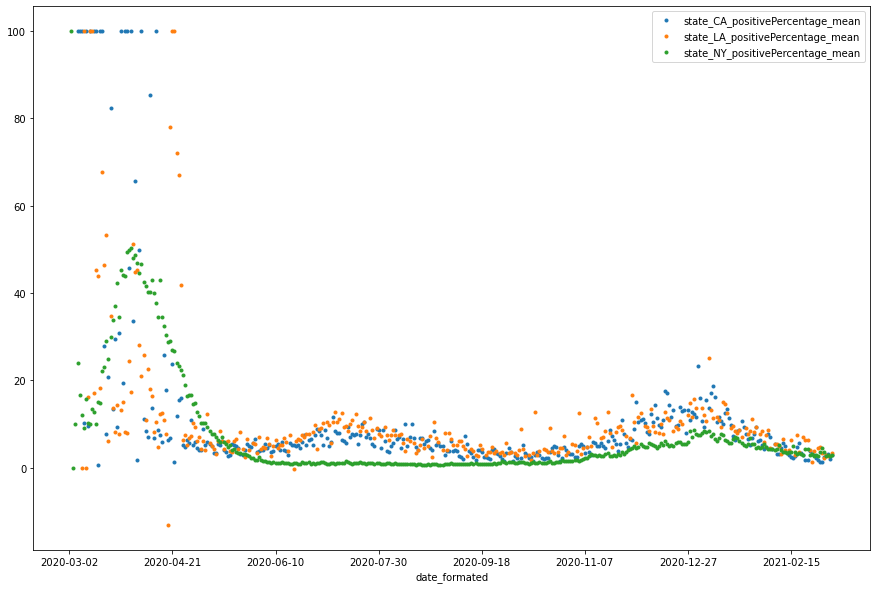

In [2]:
import boto3
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s3 = boto3.resource('s3')
s3_bucket = 'glueworkshop-ray-us-east-2'
bucket = s3.Bucket(s3_bucket)
prefix_objs = bucket.objects.filter(Prefix="output/lab5/csv/covid-testing-recipe-job_17Jun2021_1623907392417/")

prefix_df = []

for obj in prefix_objs:
    key = obj.key
    body = obj.get()['Body'].read()
    temp = pd.read_csv(io.BytesIO(body), encoding='utf8')        
    prefix_df.append(temp)
    
df = pd.concat(prefix_df)
df.sort_values(by=['date_formated'], inplace=True)

df.plot(x = 'date_formated', 
        y = ['state_CA_positivePercentage_mean', 'state_LA_positivePercentage_mean', 'state_NY_positivePercentage_mean'], 
        style='.', 
        figsize=(15,10))
